In [7]:
import pandas as pd
full_data = pd.read_csv('BRaTSdataset_filenames.csv')
test_data = pd.read_csv('test_file_paths_clean.csv')
# print number of rows in each dataframe
print(full_data.shape)
print("Rows in full data: ",len(full_data))
print("Rows in test data: ",len(test_data))


# Remove test_data rows from full_data to avoid overlap
train_data = full_data[~full_data['path'].isin(test_data['path'])]
train_data = train_data.reset_index(drop=True)


print("Rows in full data: ",len(train_data))
print("Rows in test data: ",len(test_data))

# print rows that appear in both dataframes
print("Rows in both dataframes: ",len(train_data[train_data['path'].isin(test_data['path'])]))

(484, 1)
Rows in full data:  484
Rows in test data:  49
Rows in full data:  435
Rows in test data:  49
Rows in both dataframes:  0


In [5]:
import nibabel as nib
import tensorflow as tf
from tensorflow import keras as K

class Metrics:
    def precision_coef(self, target, prediction, axis=(1, 2), smooth=0.0001):
        """
        Precision
        \frac{\left | T \right | \cap \left | P \right |}{\left | P \right |}
        where T is the ground truth mask and P is the prediction mask
        """
        prediction = K.backend.round(prediction)  # Round to 0 or 1

        true_positives = tf.reduce_sum(target * prediction, axis=axis)
        predicted_positives = tf.reduce_sum(prediction, axis=axis)
        numerator = true_positives + smooth
        denominator = predicted_positives + smooth
        coef = numerator / denominator

        return tf.reduce_mean(coef)

    def dice_coef(self, target, prediction, axis=(1, 2), smooth=0.0001):
        """
        Sorenson Dice
        \frac{  2 \times \left | T \right | \cap \left | P \right |}{ \left | T \right | +  \left | P \right |  }
        where T is ground truth mask and P is the prediction mask
        """
        prediction = K.backend.round(prediction)  # Round to 0 or 1

        intersection = tf.reduce_sum(target * prediction, axis=axis)
        union = tf.reduce_sum(target + prediction, axis=axis)
        numerator = tf.constant(2.) * intersection + smooth
        denominator = union + smooth
        coef = numerator / denominator

        return tf.reduce_mean(coef)

    def iou_coef(self, target, prediction, axis=(1, 2), smooth=0.0001):
        """
        Intersection over Union (IoU)
        \frac{\text{Intersection}}{\text{Union}} = \frac{\text{TP}}{\text{TP} + \text{FP} + \text{FN}}
        where T is the ground truth mask and P is the prediction mask
        """
        prediction = K.backend.round(prediction)  # Round to 0 or 1

        intersection = tf.reduce_sum(target * prediction, axis=axis)
        union = tf.reduce_sum(target + prediction, axis=axis) - intersection
        coef = (intersection + smooth) / (union + smooth)

        return tf.reduce_mean(coef)

    def soft_dice_coef(self, target, prediction, axis=(1, 2), smooth=0.0001):
        """
        Sorenson (Soft) Dice  - Don't round the predictions
        \frac{  2 \times \left | T \right | \cap \left | P \right |}{ \left | T \right | +  \left | P \right |  }
        where T is ground truth mask and P is the prediction mask
        """

        intersection = tf.reduce_sum(target * prediction, axis=axis)
        union = tf.reduce_sum(target + prediction, axis=axis)
        numerator = tf.constant(2.) * intersection + smooth
        denominator = union + smooth
        coef = numerator / denominator

        return tf.reduce_mean(coef)

    def specificity(self, y_true, y_pred):
        """
        Compute specificity.
        """
        # Threshold predictions
        y_pred = K.backend.round(y_pred)

        # Count true negatives
        tn = K.backend.sum(K.backend.round(K.backend.clip((1-y_true) * (1-y_pred), 0, 1)))

        # Count false positives
        fp = K.backend.sum(K.backend.round(K.backend.clip((1-y_true) * y_pred, 0, 1)))

        # Compute specificity
        specificity = tn / (tn + fp + K.backend.epsilon())
        return specificity

metrics = Metrics()
sample = '../Task01_BrainTumour/imagesTr/BRATS_001.nii.gz'

#compute all metrics using the mask as the prediction and the target
target = nib.load(sample).get_fdata()
prediction = nib.load(sample).get_fdata()
target = target[:,:,:,0]
print("target shape: ", target.shape)


print("Precision: ", metrics.precision_coef(target, prediction))
print("Dice: ", metrics.dice_coef(target, prediction))
print("IoU: ", metrics.iou_coef(target, prediction))
print("Soft Dice: ", metrics.soft_dice_coef(target, prediction))
print("Specificity: ", metrics.specificity(target, prediction))



target shape:  (240, 240, 155)


InvalidArgumentError: Incompatible shapes: [240,240,155] vs. [240,240,155,4] [Op:Mul]

In [5]:
import os
from keras.models import load_model
import numpy as np

from ang_loader import load_datasets

import tensorflow as tf
from tensorflow import keras as K

trainloaders, valloaders, valloader_global, testloader, input_shape, output_shape = load_datasets(num_partitions=2,batch_size=20,  val_ratio=0.1)

import matplotlib.pyplot as plt
import numpy as np

num_batches = len(testloader)
print("Num batches ",num_batches)
num_slices_per_scan = testloader.num_slices_per_scan
print("Num slices per scan = ",num_slices_per_scan)

print("haha")
num_samples = 5
suitable_samples=0
# Plot
# fig, axes = plt.subplots(nrows=num_samples, ncols=5, figsize=(15, 15))


    

Train set shape: (290, 1)
Validation set shape: (97, 1)
Test set shape: (97, 1)
No overlaps found between training and test datasets.
['../Task01_BrainTumour/./imagesTr/BRATS_366.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_218.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_197.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_467.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_344.nii.gz']

['../Task01_BrainTumour/./imagesTr/BRATS_350.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_378.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_346.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_442.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_266.nii.gz']
Client 1:
Number of images in trainloader: 20305
Number of images in valloader: 2170
----------------------
Client 2:
Number of images in trainloader: 20305
Number of images in valloader: 2170
----------------------
Number of images in global_valloader: 15035
Number of images in testloader: 15035
Total number of images: 75020
Total

In [15]:

import matplotlib.pyplot as plt

for i, batch in enumerate(testloader):
    print(i)
    if i<2:
        continue
    if suitable_samples >= num_samples:
        break  # Stop if you've processed enough batches
    print("Batch ",i)
    print("length of batch ",len(batch))
    input_slices, targets = batch
    print("length of input slices ",len(input_slices))
    print("length of targets ",len(targets))
    count=10
    while count < len(input_slices): 
        
        input_slice = input_slices[count]
        target = targets[count]

        if target.all() == 0:
            count+=1
            continue
        
        # Display input slice
        plt.subplot(1, 2, 1)
        plt.imshow(input_slice, cmap="gray")
        plt.title("Input Slice")
        
        # Display target
        plt.subplot(1, 2, 2)
        plt.imshow(target, cmap="gray")
        plt.title("Target")
        
        plt.show()
        
        count += 1
    break

0
1
2
Batch  2
length of batch  2
length of input slices  20
length of targets  20


In [38]:
epsilon = 1e-5  # Threshold for checking if a value is close to zero

slices_with_no_tumour = 0
slices_with_tumour = 0
slices_with_small_tumour = 0

print("num batches =", len(testloader))

for i, batch in enumerate(testloader):
    print("Batch", i)
    input_slices, targets = batch
    print("shape of input slices", len(input_slices))
    print("shape of targets", len(targets))
    
    for count in range(len(input_slices)): 
        target = targets[count]
        total_target_value = np.sum(target)
        
        # If the sum of the target is close to zero
        if total_target_value < epsilon:
            slices_with_no_tumour += 1
        # If the sum of the target is small but not zero
        elif total_target_value < 2:
            slices_with_small_tumour += 1
        else:
            slices_with_tumour += 1

print("FINAL")
print("Slices with no tumour", slices_with_no_tumour)
print("Slices with small tumour", slices_with_small_tumour)
print("Slices with tumour", slices_with_tumour)


num batches = 5
Batch 0
shape of input slices 20
shape of targets 20
Batch 1
shape of input slices 20
shape of targets 20
Batch 2
shape of input slices 20
shape of targets 20
Batch 3
shape of input slices 20
shape of targets 20
Batch 4
shape of input slices 20
shape of targets 20
FINAL
Slices with no tumour 100
Slices with small tumour 0
Slices with tumour 0


### To vizualize slices coming from data loader ###

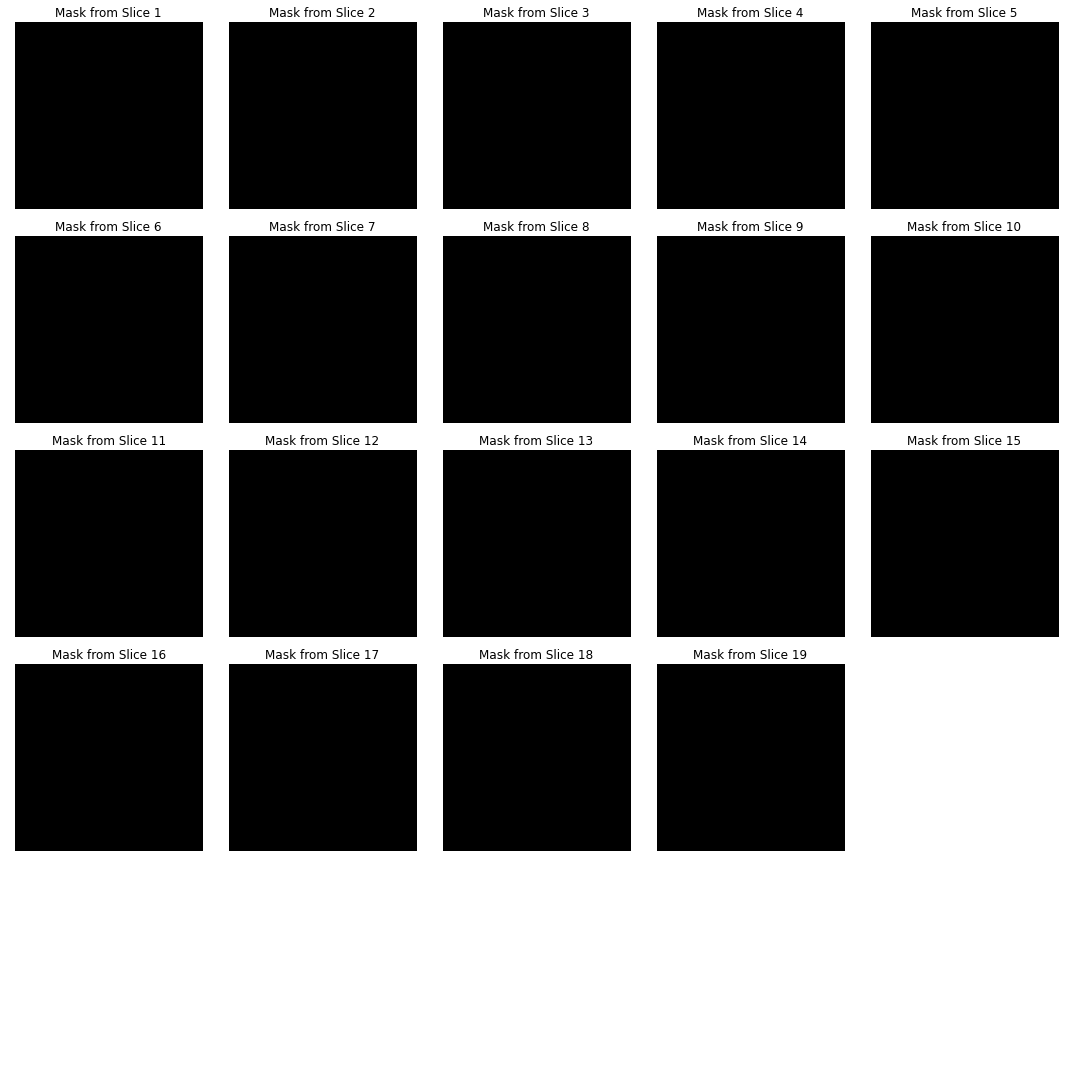

In [58]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Select the first batch
_, targets = testloader[4]

offset = 1  # Change this value to view different sets of 25 masks from the batch

# Sequentially select slices starting from the offset
sequential_slices = [i for i in range(offset, offset + 25) if i < len(targets)]

for ax in axes:
    # If there's no more slices left, hide the remaining axes
    if not sequential_slices:
        ax.axis('off')
        continue
    
    slice_idx = sequential_slices.pop(0)
    target = targets[slice_idx]
    
    ax.imshow(target[:,:,0], cmap='gray')
    ax.set_title(f'Mask from Slice {slice_idx}')
    ax.axis('off')

plt.tight_layout()
plt.show()


### Viewing masks from without datagenerator ###

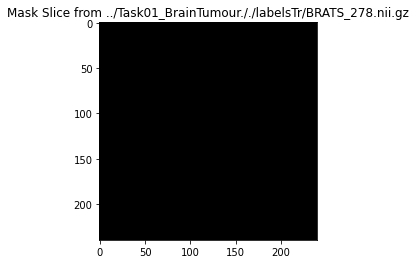

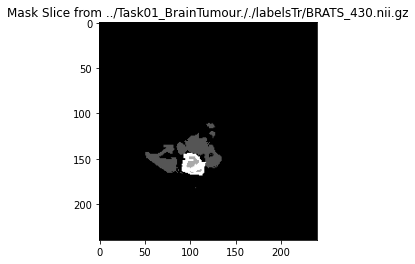

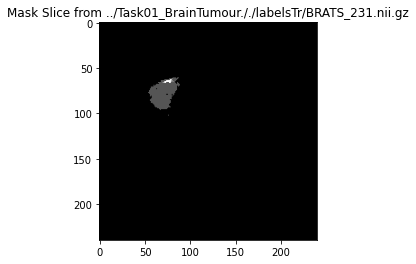

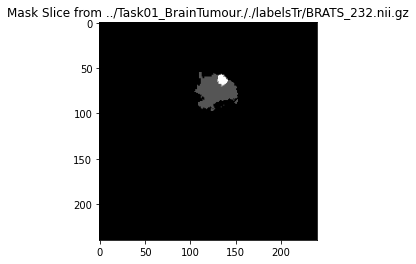

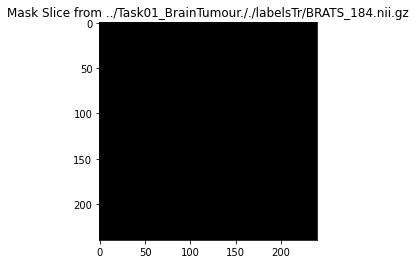

In [46]:
import nibabel as nib
test_dataset = pd.read_csv('test_file_paths_clean.csv')
# Randomly select 5 files from the test dataset
random_files = random.sample(test_dataset['path'].tolist(), 5)
random_files = ['../Task01_BrainTumour' + path for path in random_files]
for file_path in random_files:
    # Replace 'imagesTr' with 'labelsTr' to get the path for the mask
    mask_path = file_path.replace("imagesTr", "labelsTr")
    
    mask = np.array(nib.load(mask_path).dataobj)
    
    # Randomly select a slice
    slice_idx = random.choice(range(mask.shape[2]))
    mask_slice = mask[:, :, slice_idx]
    
    plt.figure()
    plt.imshow(mask_slice, cmap='gray')
    plt.title(f'Mask Slice from {mask_path}')
    plt.show()


### The code below is just to see if there are scans with tumours ###


Image shape  (240, 240, 155, 4)
Mask shape  (240, 240, 155)


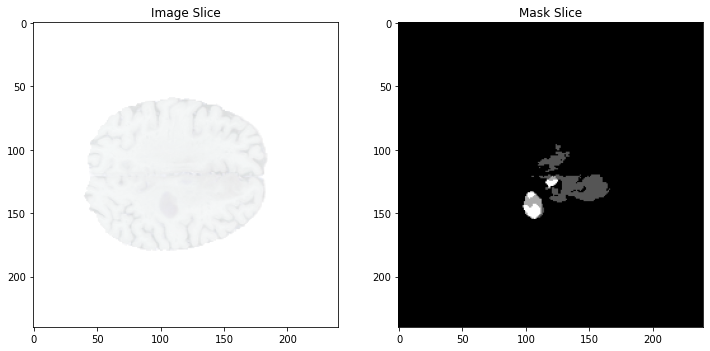

In [34]:

import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

# Load the csv file
df = pd.read_csv('test_file_paths_clean.csv')

# Assuming you have a column named 'image_path' in the csv
image_paths = df['path'].tolist()
# Prepend 'Task01_BrainTumour' to each image path
image_paths = ['../Task01_BrainTumour' + path for path in image_paths]


# Derive mask paths from image paths
mask_paths = [path.replace('imagesTr', 'labelsTr') for path in image_paths]

def display_slice(image_path, mask_path, slice_index):
    # Load the image and mask
    img_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)
    
    # Convert them to numpy arrays
    img = img_nii.get_fdata()
    mask = mask_nii.get_fdata()

    print("Image shape ",img.shape)
    print("Mask shape ",mask.shape)
    # Rescale the image for better visualization
    img_max = img.max()
    img_min = img.min()
    img_rescaled = (img - img_min) / (img_max - img_min)

    # Display the specified slice
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img_rescaled[:, :, slice_index], cmap='gray')
    ax[0].set_title('Image Slice')

    ax[1].imshow(mask[:, :, slice_index], cmap='gray')
    ax[1].set_title('Mask Slice')
    plt.show()

# Specify the image number and slice index you want to display
img_number = 5  # For the first image and mask pair in the csv
slice_index = 100  # An arbitrary slice number, adjust as needed
display_slice(image_paths[img_number], mask_paths[img_number], slice_index)


### try the same but with train dataloader ###


Train set shape: (290, 1)
Validation set shape: (97, 1)
Test set shape: (97, 1)
No overlaps found between training and test datasets.
['../Task01_BrainTumour/./imagesTr/BRATS_366.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_218.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_197.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_467.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_344.nii.gz']

['../Task01_BrainTumour/./imagesTr/BRATS_350.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_378.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_346.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_442.nii.gz', '../Task01_BrainTumour/./imagesTr/BRATS_266.nii.gz']
Client 1:
Number of images in trainloader: 20305
Number of images in valloader: 2170
----------------------
Client 2:
Number of images in trainloader: 20305
Number of images in valloader: 2170
----------------------
Number of images in global_valloader: 15035
Number of images in testloader: 15035
Total number of images: 75020
Total

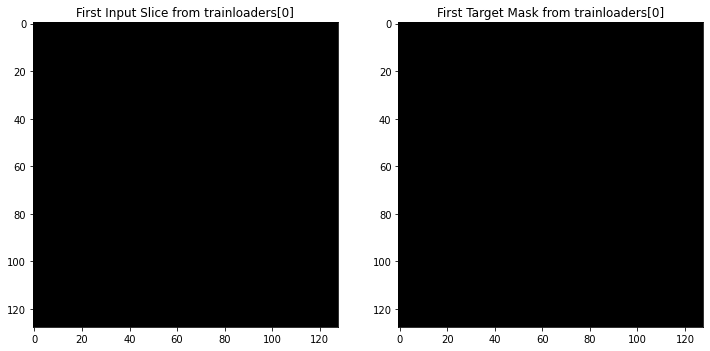

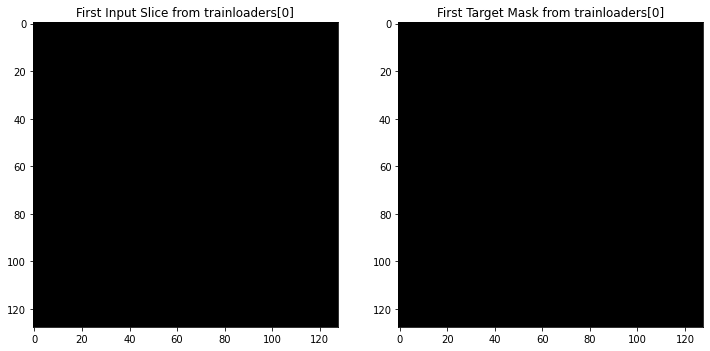

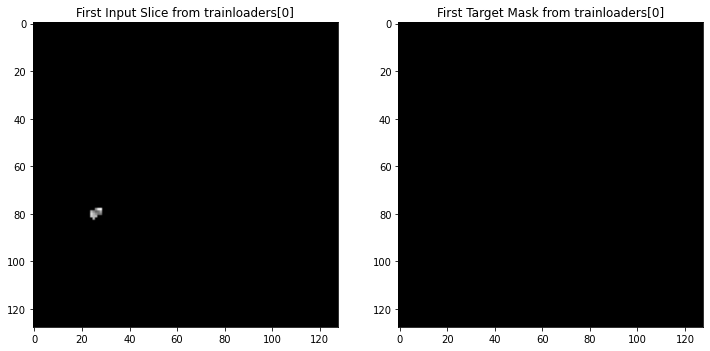

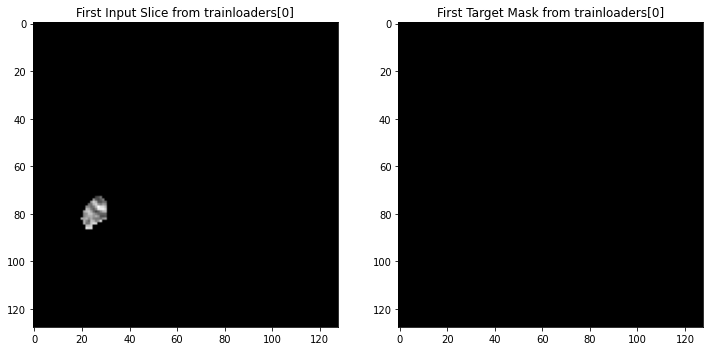

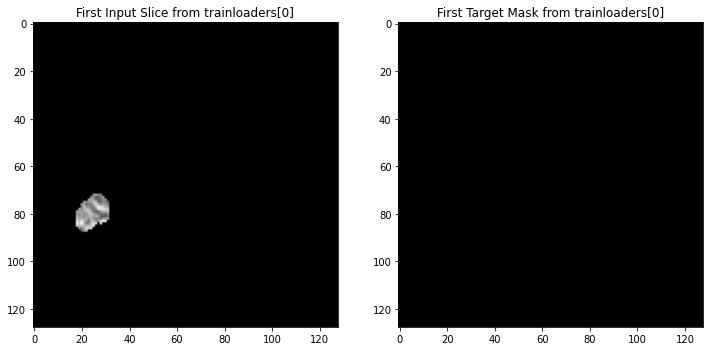

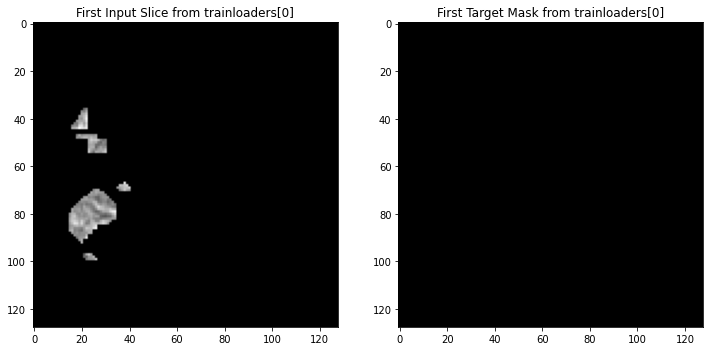

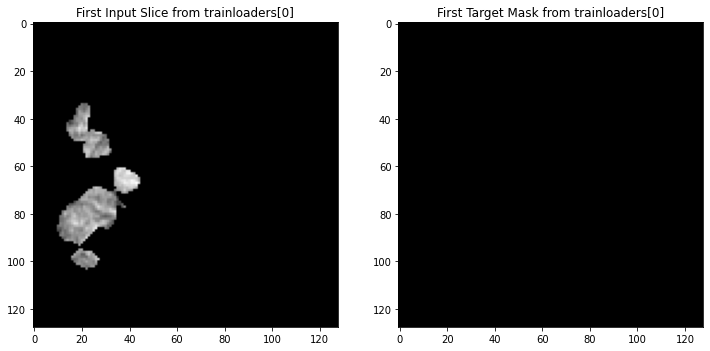

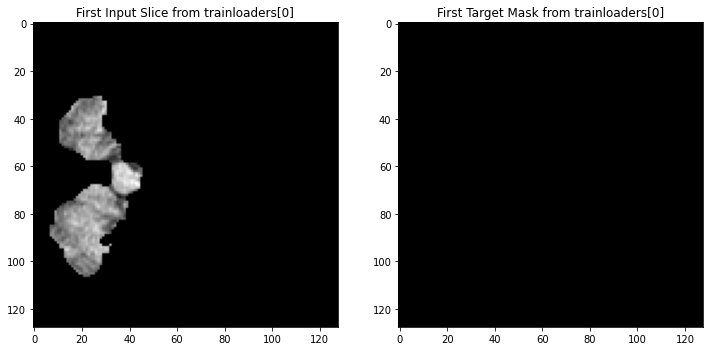

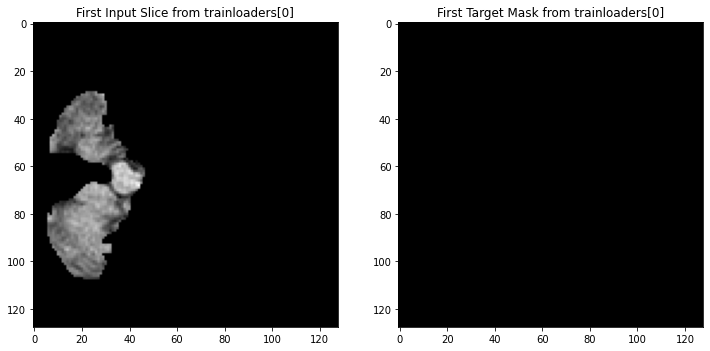

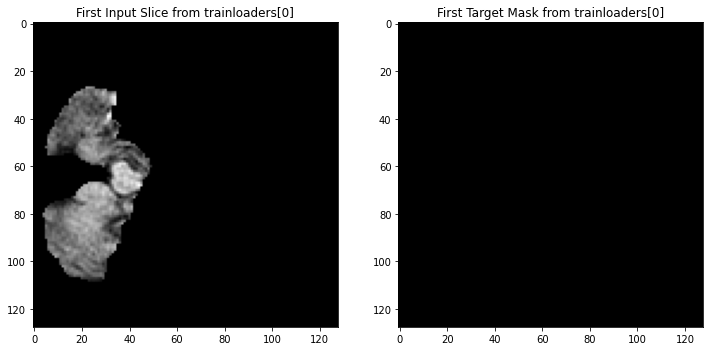

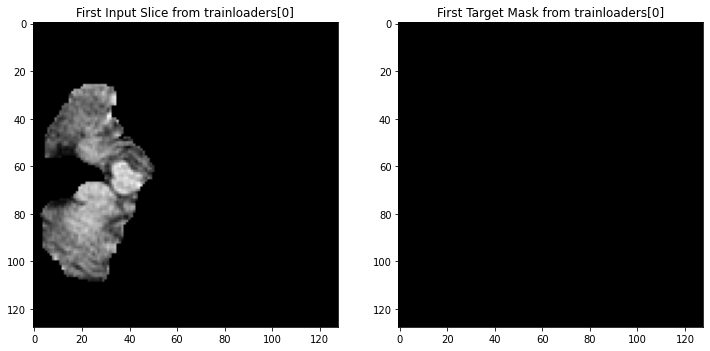

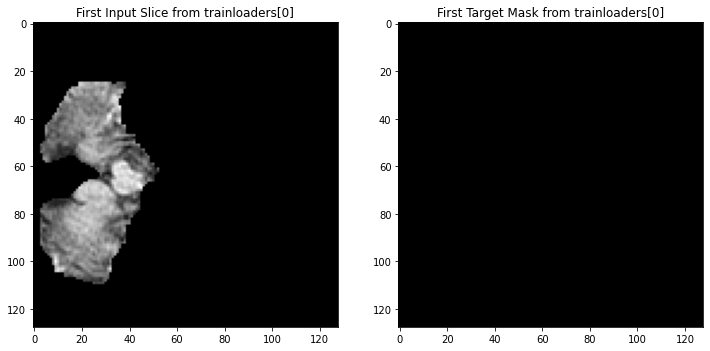

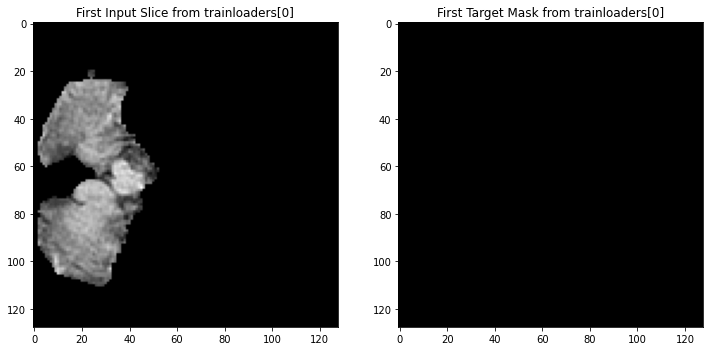

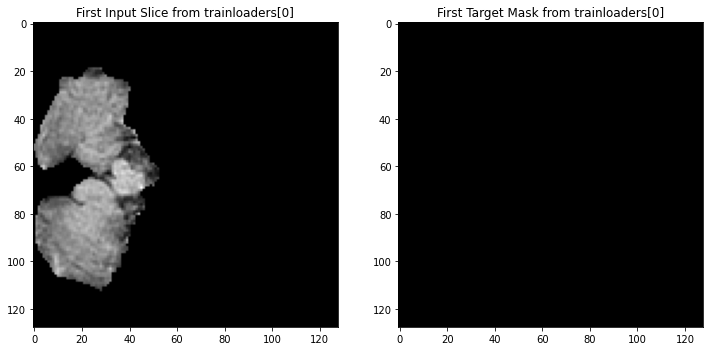

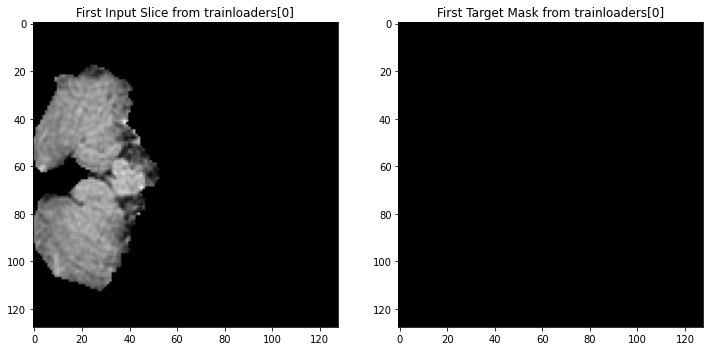

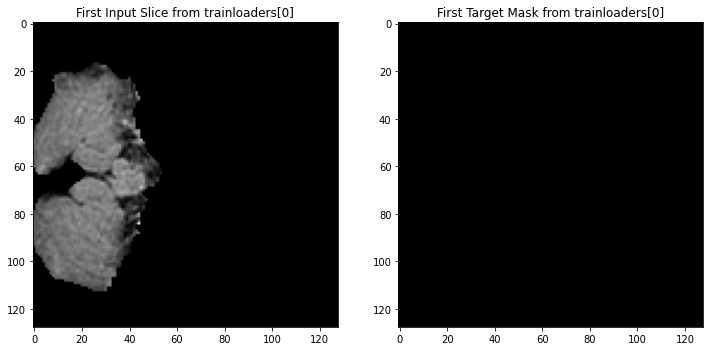

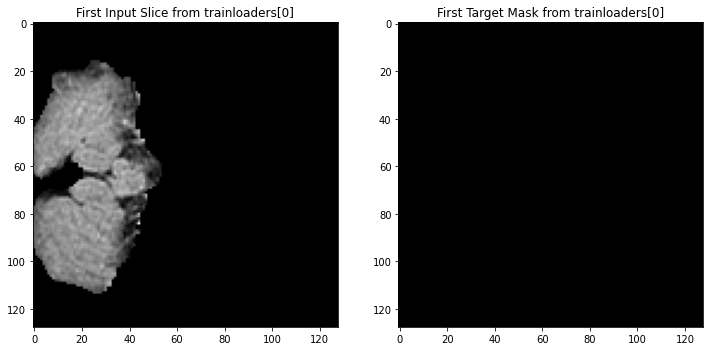

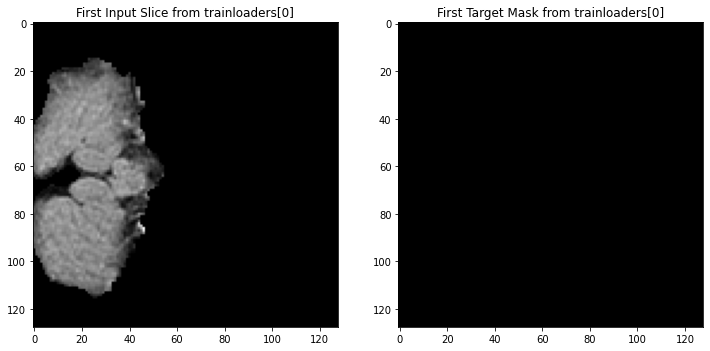

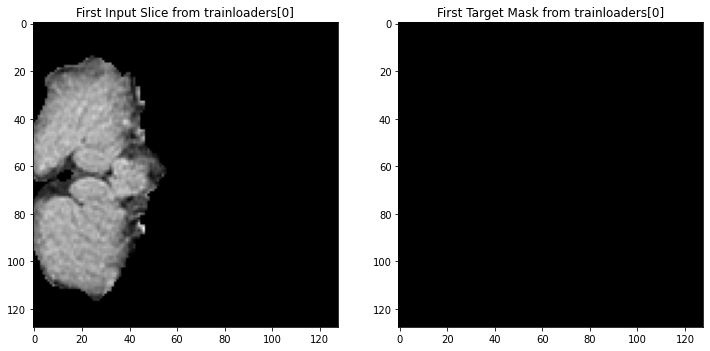

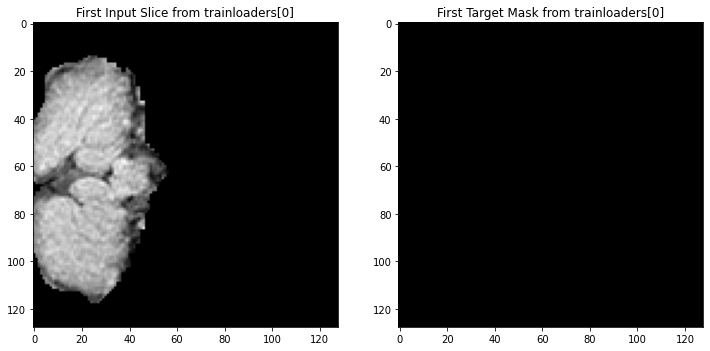

IndexError: index 20 is out of bounds for axis 0 with size 20

In [78]:
trainloaders, valloaders, valloader_global, testloader, input_shape, output_shape = load_datasets(num_partitions=2,batch_size=20,  val_ratio=0.1)

trainloader= trainloaders[0]
# batch_one = next(iter(trainloader))
# input_slices, targets =  trainloader[5]  # Running this will have lots of masks. extract img and msk from first batch (remember they have been shuffeled)
input_slices, targets =  testloader[4]


for i in range(0,50):
    first_input_slice = input_slices[i]
    first_target = targets[i]
    # 3. Display the image and mask
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(first_input_slice[:,:,0], cmap='gray')
    plt.title('First Input Slice from trainloaders[0]')

    plt.subplot(1, 2, 2)
    plt.imshow(first_target[:,:,0], cmap='gray')
    plt.title('First Target Mask from trainloaders[0]')

    plt.show()
